<a href="https://colab.research.google.com/github/DIFACQUIM/Art-Driven-by-Visual-Representations-of-Chemical-Space-/blob/main/05_TSNE_FLAVOR_CATEGORIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.utils import io
import tqdm.notebook
import os, sys, random
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
      # Install rdkit
      !pip -q install rdkit
      pbar.update(100)
import pandas as pd
import numpy as np
from sys import argv

  0%|          | 0/100 [00:00<?, ?it/s]

In [2]:
# For save files at drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. t-SNE for flavor cotegory: Ground flavors

# 1.1. Load datasets

In [3]:
url = "https://raw.githubusercontent.com/DIFACQUIM/Art-Driven-by-Visual-Representations-of-Chemical-Space-/main/Datasets/01_ground_flavors_16JUNE2023.csv"
DATA = pd.read_csv(url)
DATA.head(2)

,COMPOUND_ID,NAME_FOOD_DB,NEW_SMILES,FLAVOR_ID,NAME_FLAVOR,FLAVOR_GROUP
0,411,Geranyl 3-methylbutanoate,CC(C)=CCCC(C)=CCOC(=O)CC(C)C,59.0,green,green
1,423,5Z-Octenyl acetate,CCC=CCCCCOC(C)=O,59.0,green,green


In [4]:
DATA = DATA[['FLAVOR_GROUP', 'NEW_SMILES']]
DATA.head(2)

,FLAVOR_GROUP,NEW_SMILES
0,green,CC(C)=CCCC(C)=CCOC(=O)CC(C)C
1,green,CCC=CCCCCOC(C)=O


## 1.2. Calculate molecular descriptors

In [5]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

DATA["HBA"] = [Descriptors.NumHAcceptors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["HBD"] = [Descriptors.NumHDonors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["RB"] = [Descriptors.NumRotatableBonds(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["LogP"] = [Descriptors.MolLogP(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["TPSA"] = [Descriptors.TPSA(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["MW"] = [Descriptors.MolWt(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA.head(2)

,FLAVOR_GROUP,NEW_SMILES,HBA,HBD,RB,LogP,TPSA,MW
0,green,CC(C)=CCCC(C)=CCOC(=O)CC(C)C,2,0,7,4.2684,26.3,238.371
1,green,CCC=CCCCCOC(C)=O,2,0,6,2.6860,26.3,170.252


## 1.3. Generate t-SNE

In [6]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data_tsne = DATA.copy()
data_tsne = data_tsne.drop(labels = ["FLAVOR_GROUP", "NEW_SMILES"],axis = 1)
data_tsne = StandardScaler().fit_transform(data_tsne)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tcm_tsne_results = tsne.fit_transform(data_tsne)
# Concat numpy array
label = DATA[["FLAVOR_GROUP"]]
label = label.to_numpy()
arr = np.concatenate((label, tcm_tsne_results), axis = 1)
# Create dataframe
tsne_dataset = pd.DataFrame(data=arr, columns = ['FLAVOR_GROUP','component1', 'component2'] )
tsne_dataset.head(5)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 655 samples in 0.002s...
[t-SNE] Computed neighbors for 655 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 655 / 655
[t-SNE] Mean sigma: 0.641564
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.146076
[t-SNE] KL divergence after 300 iterations: 0.455375


,FLAVOR_GROUP,component1,component2
0,green,10.973418,4.467545
1,green,2.677368,2.906286
2,green,3.326193,8.375586
3,green,-8.83986,5.355815
4,green,-6.688514,9.8415


## 1.4 Plot t-SNE

<Figure size 640x480 with 0 Axes>

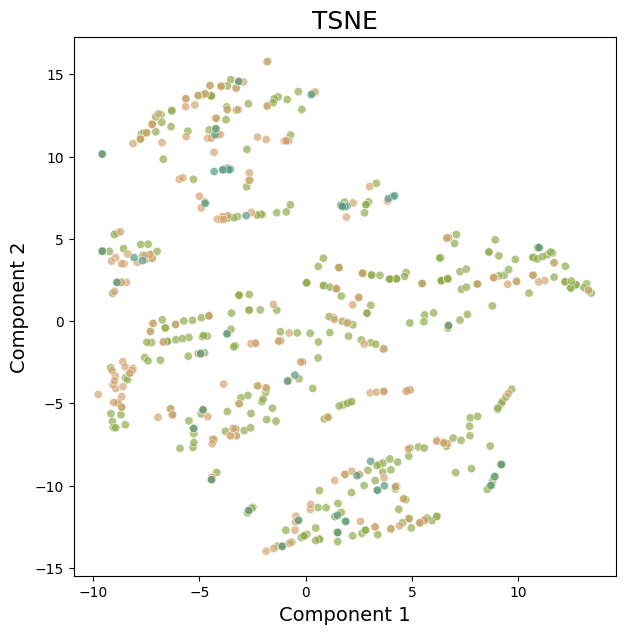

In [7]:
# Plot t-SNE
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(7,7))
plt.xlabel("Component 1", fontsize=14)
plt.ylabel("Component 2", fontsize=14)
plt.title("TSNE",fontsize=18 )

import seaborn as sns
sns.scatterplot(
                x = tsne_dataset["component1"],
                y = tsne_dataset["component2"],
                hue = tsne_dataset["FLAVOR_GROUP"], #Labels
                alpha=0.7,
                palette = ['#90ac4d','#d4a572','#579980'],
                legend=False
                )
# Save figure
plt.savefig("Ground_flavors.jpg", dpi=500)

# 2. t-SNE for flavor cotegory: Wine-tasting

## 2.1. Load datasets

In [8]:
# Read data set
url = "https://raw.githubusercontent.com/DIFACQUIM/Art-Driven-by-Visual-Representations-of-Chemical-Space-/main/Datasets/02_wine_notes_16JUNE2023.csv"
DATA = pd.read_csv(url)
DATA.head(2)

,COMPOUND_ID,NAME_FOOD_DB,NEW_SMILES,FLAVOR_ID,NAME_FLAVOR,FLAVOR_GROUP
0,373,Prenyl acetate,CC(=O)OCC=C(C)C,71.0,banana,fruity
1,411,Geranyl 3-methylbutanoate,CC(C)=CCCC(C)=CCOC(=O)CC(C)C,69.0,apple,fruity


In [9]:
DATA = DATA[['FLAVOR_GROUP', 'NEW_SMILES']]
DATA.head(2)

,FLAVOR_GROUP,NEW_SMILES
0,fruity,CC(=O)OCC=C(C)C
1,fruity,CC(C)=CCCC(C)=CCOC(=O)CC(C)C


## 2.2. Calculate molecular descriptors

In [10]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

DATA["HBA"] = [Descriptors.NumHAcceptors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["HBD"] = [Descriptors.NumHDonors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["RB"] = [Descriptors.NumRotatableBonds(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["LogP"] = [Descriptors.MolLogP(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["TPSA"] = [Descriptors.TPSA(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["MW"] = [Descriptors.MolWt(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA.head(2)

,FLAVOR_GROUP,NEW_SMILES,HBA,HBD,RB,LogP,TPSA,MW
0,fruity,CC(=O)OCC=C(C)C,2,0,2,1.5157,26.3,128.171
1,fruity,CC(C)=CCCC(C)=CCOC(=O)CC(C)C,2,0,7,4.2684,26.3,238.371


## 2.3. Generate t-SNE

In [11]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data_tsne = DATA.copy()
data_tsne = data_tsne.drop(labels = ["FLAVOR_GROUP", "NEW_SMILES"],axis = 1)
data_tsne = StandardScaler().fit_transform(data_tsne)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tcm_tsne_results = tsne.fit_transform(data_tsne)
# Concatenar arrays de numpy
label = DATA[["FLAVOR_GROUP"]]
label = label.to_numpy()
arr = np.concatenate((label, tcm_tsne_results), axis = 1)
# Crear un nuevo dataframe
tsne_dataset = pd.DataFrame(data=arr, columns = ['FLAVOR_GROUP','component1', 'component2'] )
tsne_dataset.head(5)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1024 samples in 0.007s...
[t-SNE] Computed neighbors for 1024 samples in 0.153s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1024
[t-SNE] Computed conditional probabilities for sample 1024 / 1024
[t-SNE] Mean sigma: 0.445784
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.805771
[t-SNE] KL divergence after 300 iterations: 0.575644


,FLAVOR_GROUP,component1,component2
0,fruity,-9.273376,0.677634
1,fruity,10.368841,-2.755148
2,fruity,11.247646,-5.138124
3,fruity,1.109098,-3.393846
4,fruity,-6.365429,5.919438


## 2.4 Plot t-SNE

<Figure size 640x480 with 0 Axes>

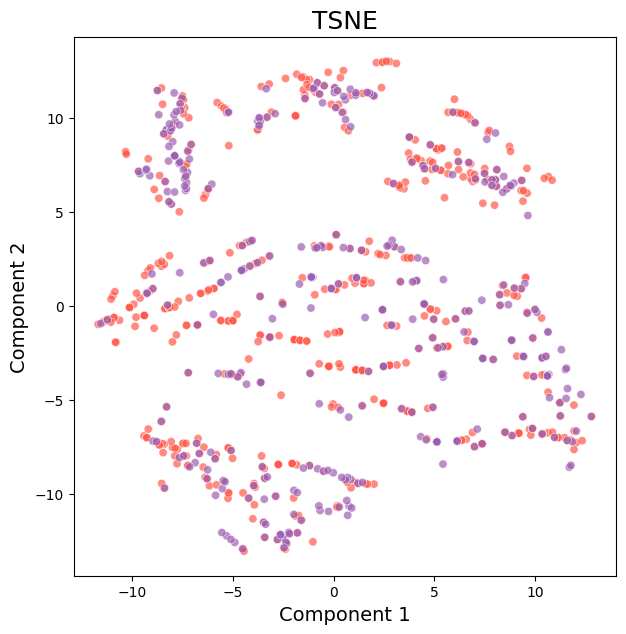

In [12]:
# Plot t-SNE
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(7,7))
plt.xlabel("Component 1", fontsize=14)
plt.ylabel("Component 2", fontsize=14)
plt.title("TSNE",fontsize=18 )

import seaborn as sns
sns.scatterplot(
                x = tsne_dataset["component1"],
                y = tsne_dataset["component2"],
                hue = tsne_dataset["FLAVOR_GROUP"], #Labels
                alpha=0.7,
                palette = ['#ff584b', '#9c5fb3'],
                legend=False
              )
# Save figure
plt.savefig("Wine_tasting.jpg", dpi=500)

# 3. t-SNE for flavor cotegory: Spicy and Fatty

## 3.1. Load datasets

In [13]:
# Read data set
url = "https://raw.githubusercontent.com/DIFACQUIM/Art-Driven-by-Visual-Representations-of-Chemical-Space-/main/Datasets/03_spicy_fatty_16JUNE2023.csv"
DATA = pd.read_csv(url)
DATA.head(2)

,COMPOUND_ID,NAME_FOOD_DB,NEW_SMILES,FLAVOR_ID,NAME_FLAVOR,FLAVOR_GROUP
0,499,2-Acetyl-3-ethylpyrazine,CCc1nccnc1C(C)=O,17.0,oily,fatty
1,700,Undecanoic acid,CCCCCCCCCCC(=O)O,15.0,creamy,fatty


In [14]:
DATA = DATA[['FLAVOR_GROUP', 'NEW_SMILES']]
DATA.head(2)

,FLAVOR_GROUP,NEW_SMILES
0,fatty,CCc1nccnc1C(C)=O
1,fatty,CCCCCCCCCCC(=O)O


## 3.2. Calculate molecular descriptors

In [15]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

DATA["HBA"] = [Descriptors.NumHAcceptors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["HBD"] = [Descriptors.NumHDonors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["RB"] = [Descriptors.NumRotatableBonds(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["LogP"] = [Descriptors.MolLogP(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["TPSA"] = [Descriptors.TPSA(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["MW"] = [Descriptors.MolWt(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA.head(2)

,FLAVOR_GROUP,NEW_SMILES,HBA,HBD,RB,LogP,TPSA,MW
0,fatty,CCc1nccnc1C(C)=O,3,0,2,1.2416,42.85,150.181
1,fatty,CCCCCCCCCCC(=O)O,1,1,9,3.6018,37.30,186.295


### 3.3. Generate t-SNE

In [16]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data_tsne = DATA.copy()
data_tsne = data_tsne.drop(labels = ["FLAVOR_GROUP", "NEW_SMILES"],axis = 1)
data_tsne = StandardScaler().fit_transform(data_tsne)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tcm_tsne_results = tsne.fit_transform(data_tsne)
# Concatenar arrays de numpy
label = DATA[["FLAVOR_GROUP"]]
label = label.to_numpy()
arr = np.concatenate((label, tcm_tsne_results), axis = 1)
# Crear un nuevo dataframe
tsne_dataset = pd.DataFrame(data=arr, columns = ['FLAVOR_GROUP','component1', 'component2'] )
tsne_dataset.head(5)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 430 samples in 0.001s...
[t-SNE] Computed neighbors for 430 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 430 / 430
[t-SNE] Mean sigma: 0.649272
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.631042
[t-SNE] KL divergence after 300 iterations: 0.356533


,FLAVOR_GROUP,component1,component2
0,fatty,-3.988695,1.801459
1,fatty,2.435213,13.187036
2,fatty,9.505881,-2.468198
3,fatty,8.418109,-4.021842
4,fatty,-8.129308,-8.771106


## 3.4 Plot t-SNE

<Figure size 640x480 with 0 Axes>

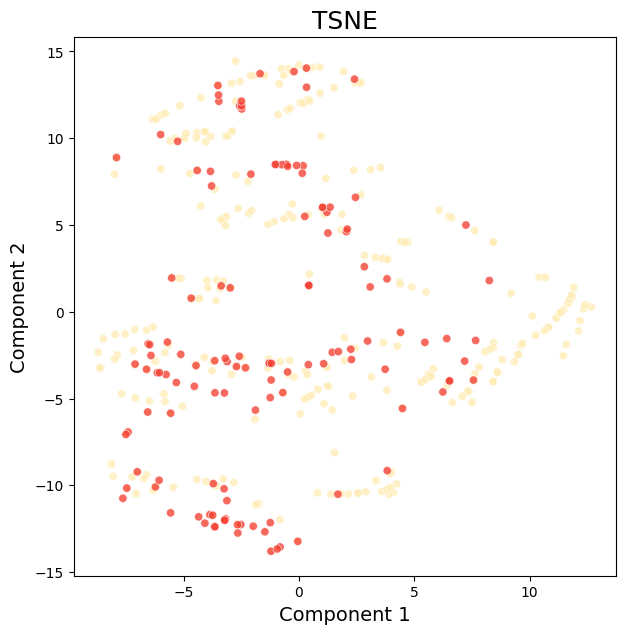

In [17]:
# Plot t-SNE
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(7,7))
plt.xlabel("Component 1", fontsize=14)
plt.ylabel("Component 2", fontsize=14)
plt.title("TSNE",fontsize=18 )

import seaborn as sns
sns.scatterplot(
                x = tsne_dataset["component1"],
                y = tsne_dataset["component2"],
                hue = tsne_dataset["FLAVOR_GROUP"], #Labels
                alpha=0.8,
                palette = ['#ffedb7','#f44336'],
                legend=False
                )
# Save figure
plt.savefig("Fatty_spicy.jpg", dpi=500)

# 4. t-SNE for flavor cotegory: Natural remedies

## 4.1. Load datasets

In [18]:
url = "https://raw.githubusercontent.com/DIFACQUIM/Art-Driven-by-Visual-Representations-of-Chemical-Space-/main/Datasets/04_natural_remedies_16JUNE2023.csv"
DATA = pd.read_csv(url)
DATA.head(2)

,COMPOUND_ID,NAME_FOOD_DB,NEW_SMILES,FLAVOR_ID,NAME_FLAVOR,FLAVOR_GROUP
0,373,Prenyl acetate,CC(=O)OCC=C(C)C,44.0,sweet,balsamic
1,477,"1-(3,4-Dimethoxyphenyl)ethanone",COc1ccc(C(C)=O)cc1OC,44.0,sweet,balsamic


In [19]:
DATA = DATA[['FLAVOR_GROUP', 'NEW_SMILES']]
DATA.head(2)

,FLAVOR_GROUP,NEW_SMILES
0,balsamic,CC(=O)OCC=C(C)C
1,balsamic,COc1ccc(C(C)=O)cc1OC


## 4.2. Calculate molecular descriptors

In [20]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

DATA["HBA"] = [Descriptors.NumHAcceptors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["HBD"] = [Descriptors.NumHDonors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["RB"] = [Descriptors.NumRotatableBonds(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["LogP"] = [Descriptors.MolLogP(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["TPSA"] = [Descriptors.TPSA(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["MW"] = [Descriptors.MolWt(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA.head(2)

,FLAVOR_GROUP,NEW_SMILES,HBA,HBD,RB,LogP,TPSA,MW
0,balsamic,CC(=O)OCC=C(C)C,2,0,2,1.5157,26.30,128.171
1,balsamic,COc1ccc(C(C)=O)cc1OC,3,0,3,1.9064,35.53,180.203


## 4.3. Generate t-SNE

In [21]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data_tsne = DATA.copy()
data_tsne = data_tsne.drop(labels = ["FLAVOR_GROUP", "NEW_SMILES"],axis = 1)
data_tsne = StandardScaler().fit_transform(data_tsne)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tcm_tsne_results = tsne.fit_transform(data_tsne)
# Concat numpy array
label = DATA[["FLAVOR_GROUP"]]
label = label.to_numpy()
arr = np.concatenate((label, tcm_tsne_results), axis = 1)
# Create dataframe
tsne_dataset = pd.DataFrame(data=arr, columns = ['FLAVOR_GROUP','component1', 'component2'] )
tsne_dataset.head(5)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 762 samples in 0.001s...
[t-SNE] Computed neighbors for 762 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 762 / 762
[t-SNE] Mean sigma: 0.554282
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.344063
[t-SNE] KL divergence after 300 iterations: 0.519687


,FLAVOR_GROUP,component1,component2
0,balsamic,-7.769791,-4.546868
1,balsamic,-7.150894,2.508639
2,balsamic,-7.327034,-6.311275
3,balsamic,-8.271574,5.312098
4,balsamic,5.59106,12.564584


## 4.4 Plot t-SNE

<Figure size 640x480 with 0 Axes>

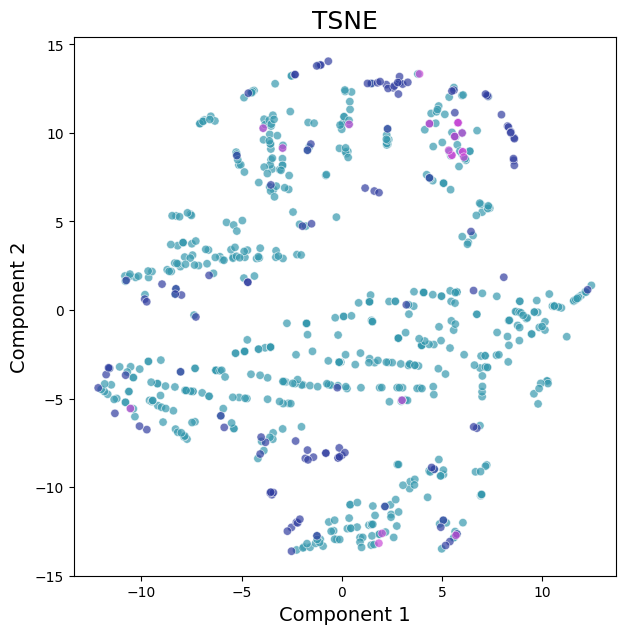

In [22]:
# Plot t-SNE
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(7,7))
plt.xlabel("Component 1", fontsize=14)
plt.ylabel("Component 2", fontsize=14)
plt.title("TSNE",fontsize=18 )

import seaborn as sns
sns.scatterplot(
                x = tsne_dataset["component1"],
                y = tsne_dataset["component2"],
                hue = tsne_dataset["FLAVOR_GROUP"], #Labels
                alpha=0.7,
                palette = ['#3799ae','#323ea0', "#c94cd6" ],
                legend=False
                )
# Save figure
plt.savefig("Natural_remedies.jpg", dpi=500)